<a href="https://colab.research.google.com/github/davidedifilippo/jupyter_notebooks/blob/main/Carico_Ohmico_Capacitivo_Serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

#funzione per il disegno dei fasori sul piano complesso

import matplotlib.pyplot as plt
import numpy as np


Diamo la possibilità di inserire la frequenza di lavoro, la resistenza e la capacità del condensatore:

In [ ]:
f = input("Inserire la frequenza di lavoro:")
f = float(f)

VG_max = input("Inserire la tensione di alimentazione:")
VG_max = float(VG_max)

VG_ph = input("Inserire la fase del generatore:")
VG_ph = float(VG_ph)

R = input("Inserire la resistenza:")
R = float(R)

C = input("Inserire la capacità in microfarad:")
C = float(C) * pow(10,-6)

VG_ph = (VG_ph/180)*np.pi #da gradi a radianti

VG = VG_max*(np.cos(VG_ph)+np.sin(VG_ph)*2j)


print("\nTensione di alimentazione: ", np.round(VG, 2))


Inserire la frequenza di lavoro:15591
Inserire la tensione di alimentazione:10
Inserire la fase del generatore:0
Inserire la resistenza:100
Inserire la capacità in microfarad:0.1

Tensione di alimentazione:  (10+0j)


Calcoliamo l'impedenza resistiva, la reattanza capacitivi, e l'impedenza capacitiva

In [ ]:
#Impedenza resistiva

ZR = R
print("ZR=", np.round(ZR,2), "Ohm")



ZR= 100.0 Ohm


In [ ]:
# Reattanza capacitiva

Xc = 1/(2*np.pi*f*C)

print("Xc=", np.round(Xc,2), "Ohm")

Xc= 102.08 Ohm


In [ ]:
#Impedenza capacitiva

Zc = -1j*Xc
print("Zc=", np.round(Zc,2), "Ohm")



Zc= -102.08j Ohm


Poi calcoliamo l'impedenza serie vista dal generatore:


In [ ]:
#Impedenza totale vista dal generatore

Zserie = ZR + Zc
print("Zserie=", np.round(Zserie,2), "Ohm")


Zserie= (100-102.08j) Ohm


Si calcola la corrente utilizzando al legge di Ohm generalizzata:

In [ ]:
#corrente assorbita dal carico serie:

Ic= VG / Zserie

print("Ic=", np.round(Ic,2), "Ampere")



Ic= (0.05+0.05j) Ampere


Calcoliamo la tensione sul condensatore e sulla resistenza:

In [ ]:
#Tensione sul componenti resistivo:

VR = R*Ic

print("VR=", np.round(VR,2), "Volt")



VR= (4.9+5j) Volt


In [ ]:
#Tensione sul componenti capacitivo:

Vc = Zc*Ic

print("Vc=", np.round(Vc,2), "Volt")

Vc= (5.1-5j) Volt


Disegnamo i fasori sul piano complesso:

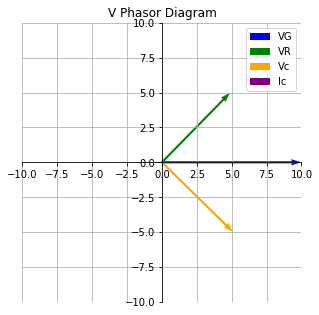

In [ ]:
# Plotting Phasor Diagram

figure = plt.subplots(figsize=(11, 6))
axe = plt.subplot(121)

plt.title('V Phasor Diagram')
axe.quiver(0, 0, np.array((np.real(VG))), np.array((np.imag(VG))), units='xy', scale=1, color='blue')
axe.quiver(0, 0, np.array((np.real(VR))), np.array((np.imag(VR))), units='xy', scale=1, color='green')
axe.quiver(0, 0, np.array((np.real(Vc))), np.array((np.imag(Vc))), units='xy', scale=1, color='orange')
axe.quiver(0, 0, np.array((np.real(Ic))), np.array((np.imag(Ic))), units='xy', scale=1, color='purple')

plt.grid()
axe.set_aspect('equal')
axe.spines['left'].set_position('zero')
axe.spines['right'].set_color('none')
axe.spines['bottom'].set_position('zero')
axe.spines['top'].set_color('none')

limit = max(abs(VG), abs(VR), abs(Vc), abs(Ic))
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)
plt.legend(("VG", "VR", "Vc", "Ic"))


